In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

### Agora vamnos impooslmvçlksjm  nfekvjnslkevmfç~

In [2]:
df = pd.read_csv('socialmedia.csv')

In [3]:
df.head()

,id,title,text,humanLanguage,pageUrl,requirements,tasks
0,JOB13030080891,Social Media & Web Management Internship,\nIntroduction\nThe Social Media & Web Managem...,en,https://www.nps.gov/hafe/getinvolved/supportyo...,"If not selected for this internship, please in...",Assist in creating and managing social media (...
1,JOB14899553632,Social Media Coordinator,ABOUT US\nThirty-Three Threads is an industry ...,en,https://www.linkedin.com/jobs/view/social-medi...,Bachelor’s degree in marketing or related fiel...,Responsible for daily content reaching followe...
2,JOB25352725960,Web Strategy and Social Media Jobs,\nThe Web Manager will become part of an exper...,en,https://web.archive.org/web/20110413001938/htt...,NaN,NaN
3,JOB25520053244,Social Media and Communications Manager (m/f) ...,\nwith high affinity to life sciences\nfull ti...,en,http://www.nature.com/naturejobs/science/jobs/...,NaN,Development and design of internal and externa...
4,JOB31104822195,Job opening: Social Media Producer,"\nThis is a position on our core social team, ...",en,http://www.washingtonpost.com/wapo-audience-te...,2+ years of journalism experience. Reporting/b...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10000 non-null  object
 1   title          10000 non-null  object
 2   text           9421 non-null   object
 3   humanLanguage  10000 non-null  object
 4   pageUrl        10000 non-null  object
 5   requirements   2895 non-null   object
 6   tasks          3809 non-null   object
dtypes: object(7)
memory usage: 547.0+ KB


In [5]:
len(df)

10000

In [6]:
#exibe linhas com pageUrl duplicados
df_duplicados = df[df.duplicated(subset=['pageUrl'])]

df_sorted = df_duplicados.sort_values(by='pageUrl')

print(df_sorted.loc[:, ['pageUrl']])

                                                pageUrl
1999  http://archinect.com/jobs/entry/149988097/proj...
2059  http://archinect.com/jobs/entry/149990582/cons...
2117  http://archinect.com/jobs/entry/149998224/juni...
2237  http://archinect.com/jobs/entry/150008871/arch...
1738  http://archinect.com/jobs/entry/150009615/phd-...
...                                                 ...
1096  https://www.mediabistro.com/jobs/openings/writ...
5994  https://www.niefs.net/job-listing/social-media...
5996    https://www.onlinejobs.ph/jobseekers/job/342767
5995  https://www.privatetunnel.com/job-position/soc...
7556  https://www.signaturit.com/es/trabajos/content...

[166 rows x 1 columns]


In [7]:
interesse = ['pageUrl', 'id']
df2 = df.drop_duplicates(subset = interesse)
len(df2)

9980

In [8]:
#exibe linhas com text duplicados
df_duplicados = df[df.duplicated(subset=['text'])]

df_sorted = df_duplicados.sort_values(by='text')

print(df_sorted.loc[:, ['text']])

     text
7412   \n
7373   \n
7372   \n
7370   \n
7351   \n
...   ...
9960  NaN
9964  NaN
9976  NaN
9979  NaN
9980  NaN

[3243 rows x 1 columns]


In [9]:
print(df.isnull().sum())

id                  0
title               0
text              579
humanLanguage       0
pageUrl             0
requirements     7105
tasks            6191
dtype: int64


In [10]:
df2 = df2.dropna(subset=['text'])
len(df2)

9403

In [11]:
len(df2)/len(df)*100

94.03

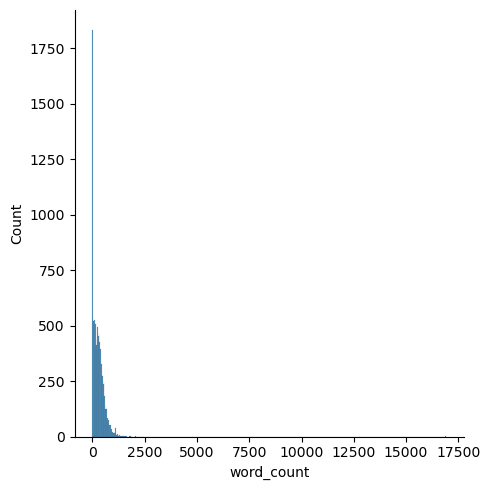

In [12]:
df2['word_count'] = df2['text'].str.count(' ') + 1
sns.displot(df2['word_count'])
plt.show()

In [13]:
textos = list(df2.text.values)
tam = []

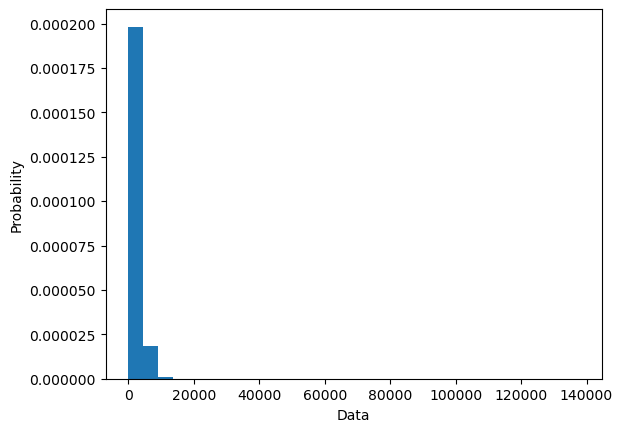

In [14]:
for i in textos:
    tam.append(len(str(i)))
    if type(i) is not str:
        print(i)

plt.hist(tam, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

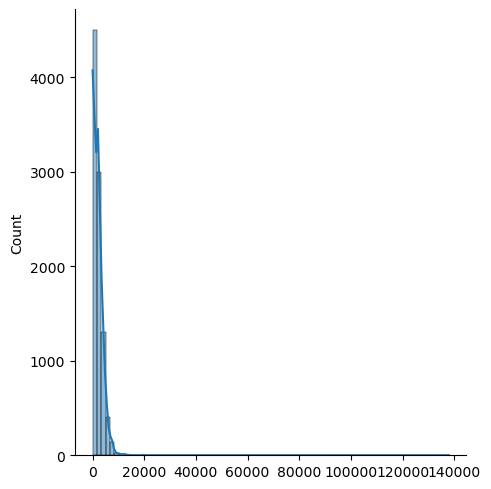

In [15]:
# !pip install seaborn
import seaborn as sns
sns.displot(tam, bins=82, kde=True);

In [16]:
#antes da remoção
len(df2)

9403

In [24]:
for i in range(len(tam)):
    if tam[i] < 300:
        print(i)
        print(textos[i])
        print('\n'*2)

10
Please submit feedback regarding the course you have just completed, including feedback on course structure, content, and instructor.




12
Skip to main content
Create job alert




21

Found 1 Washington D.C. job
© 2016 - 2017 Copyright Mediabistro Inc. Powered by Madgex Job Board Technology




34
Send "Around the Net In Social Media & Marketing: 'NY Observer' Hires Soni As Social Media Consultant"
From: editorial@mediapost.com
Recipients (required):
Email type:
Your name (required):
Message:




37

Found 1 job for $25,000 - $29,999




40
From: editorial@mediapost.com
Recipients (required):
Email type:
Your name (required):
Message:




46

Social Media jobs
Broaden your search
Refine your search
Found 2 jobs for $50,000 - $59,999




49

Found 1 job




51

Found 2 California jobs for $50,000 - $59,999




58
Send "Social Media & Marketing Daily: Digital Engagement Index"
From: editorial@mediapost.com
Recipients (required):
Email type:
Your name (required):
Message:




62

Fo

In [22]:
len(df2)

7417

In [21]:
for index, row in df2.iterrows():
    if len(str(row.text)) < 300: #alterei para remover os menores de 200
        df2 = df2.drop(index)

In [23]:
for i in range(len(tam)):
    if tam[i] > 10000:
        print(i)
        print(textos[i])
        print('\n'*20)

278

Public Citizen is a national, non-partisan, public interest group with over 400,000 members and supporters. Since its inception in 1995, Public Citizen’s Global Trade Watch (GTW) has been a leader in popularizing the globalization and trade debate by connecting these seemingly arcane policies to people’s everyday experiences – and helping people make a difference in the future of globalization by giving them the tools they need to educate their communities, hold Congress accountable for policy choices and hit the streets to protest. GTW works with diverse national and international coalitions. Today’s “trade” agreements, such as the recently derailed Trans-Pacific Partnership (TPP) and ever-damaging the North American Free Trade Agreement, have become powerful tools to expand corporate power and lock in new corporate rights. Decisions that affect our daily lives are shifted to venues where those who will live with the results have no role. Unless this “trade” regime is changed, ma

In [25]:
#após leitura decidi remover 
for index, row in df2.iterrows():
    if len(str(row.text)) > 10000:
        df2 = df2.drop(index)
    

In [26]:
len(df2)

7385

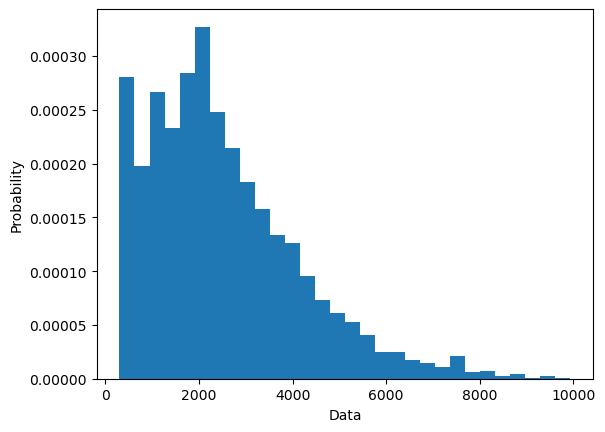

In [27]:
textos = list(df2.text.values)
tam = []

for i in textos:
    tam.append(len(str(i)))
    if type(i) is not str:
        print(i)
        
plt.hist(tam, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [29]:
df2.to_csv('social_mid_vagas_deduplicado.csv')

In [30]:
len(df2)

7385